<img src="./logo_UTN.svg" align="right" width="150" /> 
#### Teoría de Circuitos II

# Teoría de Filtrado Moderna: Funciones de aproximación
#### Dr. Ing. Mariano Llamedo Soria
Grupo de Investigación en Bioingeniería (GIBIO)


En el siguiente documento se presenta una comparativa de las funciones de aproximación estudiadas en Teoría de Filtrado Moderna, para la asignatura Teoría de Circuitos 2:

* Butterworth
* Chebyshev
* Bessel
* Cauer

El script permite parametrizar diferentes aspectos de la función de aproximación, como el ripple en la banda de paso, la atenuación en la banda de detenida y el orden. Como resultado se visualiza:

* Respuesta de módulo, fase y retardo de grupo
* Diagrama de polos y ceros



In [4]:
import scipy.signal as sig
import matplotlib as mpl
from splane import analyze_sys, pzmap, grpDelay, bodePlot
import numpy as np

mpl.rcParams['figure.figsize'] = (15,15)

def sim_aprox(aproxs, orders2analyze, ripple, attenuation):

    all_sys = []
    filter_names = []

    for (this_aprox, this_order, this_ripple, this_att) in zip(aproxs, orders2analyze, ripple, attenuation):

        if this_aprox == 'Butterworth':

            z,p,k = sig.buttap(this_order)

            eps = np.sqrt( 10**(this_ripple/10) - 1 )
            num, den = sig.zpk2tf(z,p,k)
            num, den = sig.lp2lp(num, den, eps**(-1/this_order))

            z,p,k = sig.tf2zpk(num, den)

        elif this_aprox == 'Chebyshev1':

            z,p,k = sig.cheb1ap(this_order, this_ripple)

        elif this_aprox == 'Chebyshev2':

            z,p,k = sig.cheb2ap(this_order, this_ripple)

        elif this_aprox == 'Bessel':

            z,p,k = sig.besselap(this_order, norm='delay')

        elif this_aprox == 'Cauer':

            z,p,k = sig.ellipap(this_order, this_ripple, this_att)


        num, den = sig.zpk2tf(z,p,k)

        all_sys.append(sig.TransferFunction(num,den))
        filter_names.append(this_aprox + '_ord_' + str(this_order) + '_rip_' + str(this_ripple)+ '_att_' + str(this_att))


    analyze_sys( all_sys, filter_names )


## Comparativa de órdenes


Este pequeño ejemplo permite comparar para una misma función, diferentes órdenes de aproximación.


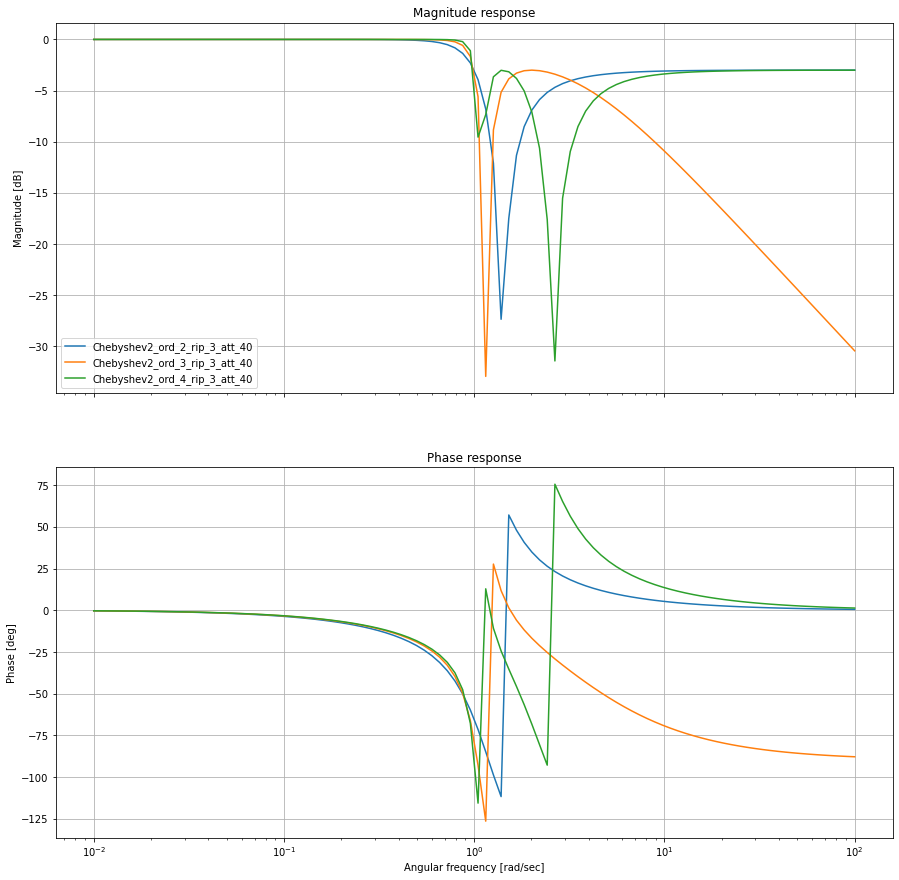

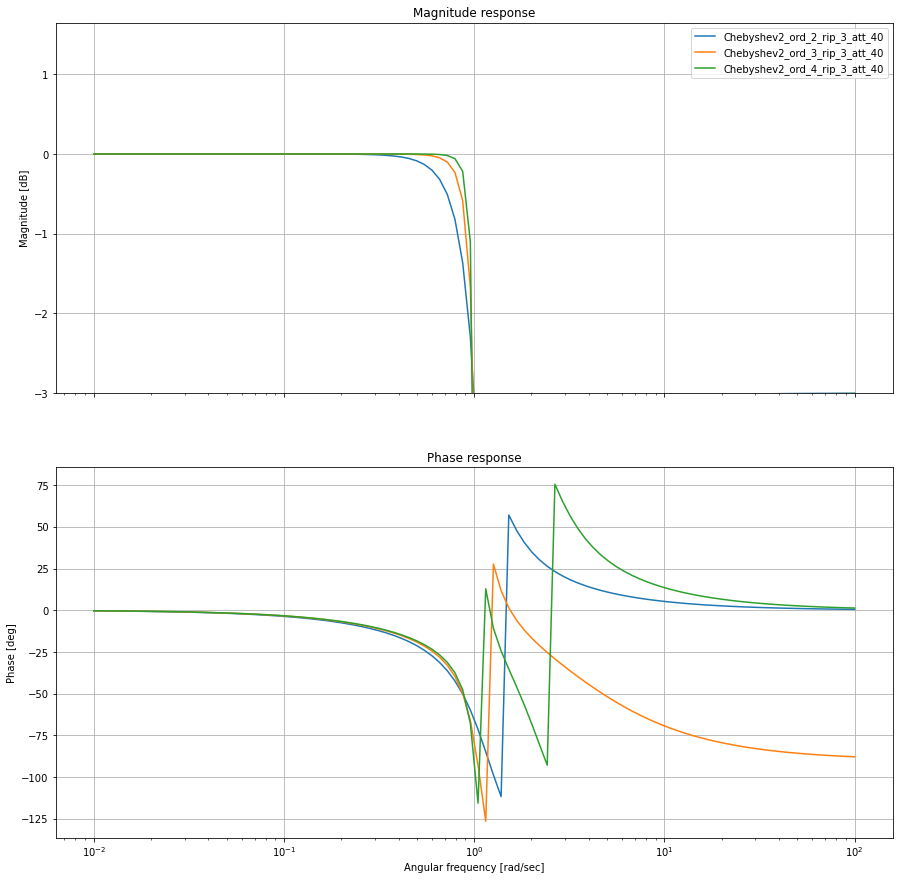

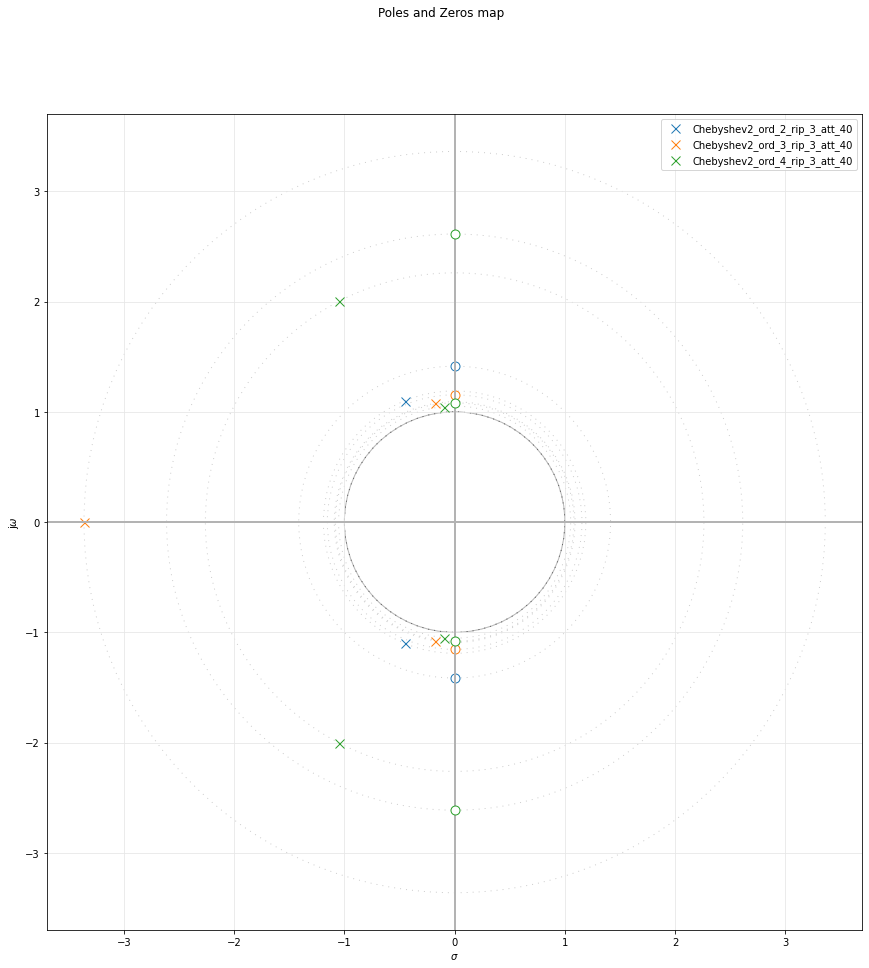

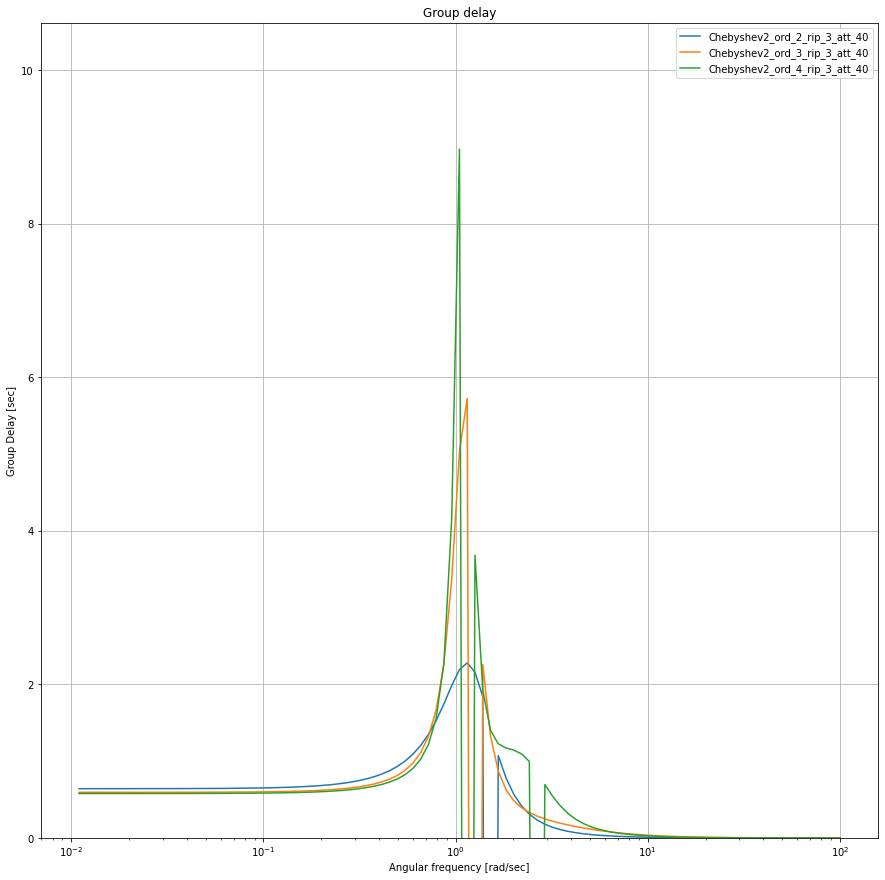

In [2]:
        
#aprox_name = 'Butterworth'
#aprox_name = 'Chebyshev1'
aprox_name = 'Chebyshev2'
#aprox_name = 'Bessel'
#aprox_name = 'Cauer'

# parametrizamos el orden para cada aproximación
orders2analyze = [2, 3, 4]

# Mismo requerimiento de ripple y atenuación
aproxs = [aprox_name] * len(orders2analyze)
ripple = [3] * len(orders2analyze) # dB \alpha_{max} <-- Sin parametrizar, lo dejo en Butterworth
attenuation = [40] * len(orders2analyze) # dB \alpha_{min} <-- Sin parametrizar, att fija


sim_aprox(aproxs, orders2analyze, ripple, attenuation)


## Comparativa de funciones de aproximación


Este pequeño ejemplo permite comparar las funciones de aproximación, para los mismos requerimientos de plantilla.


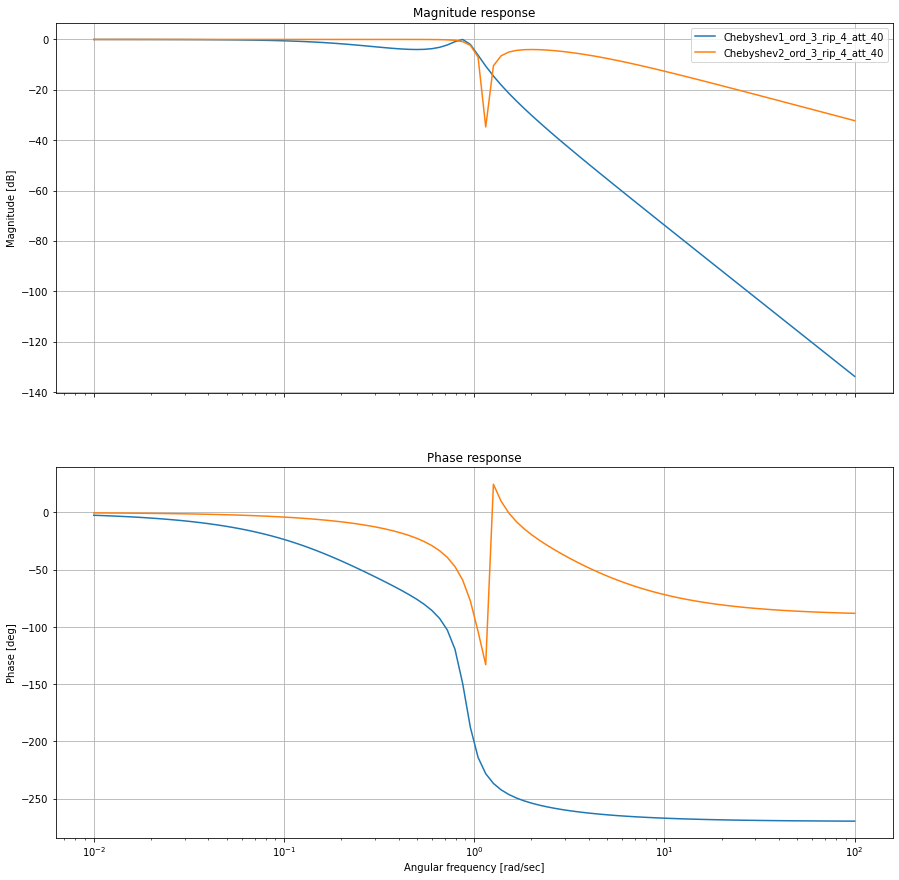

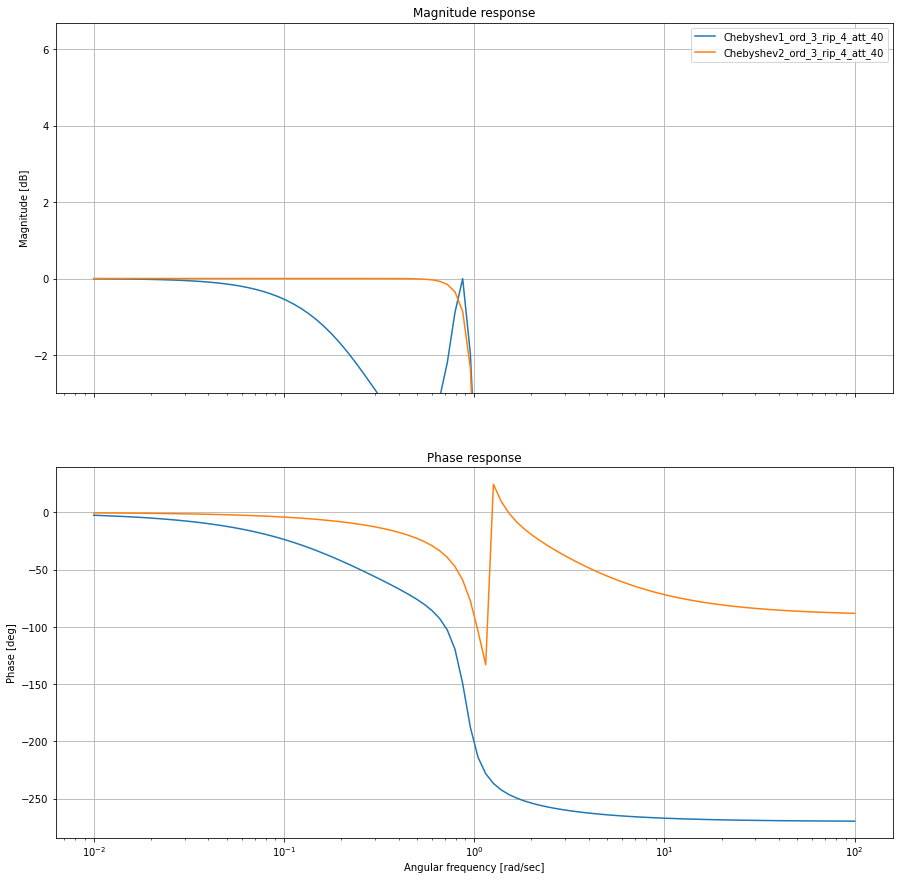

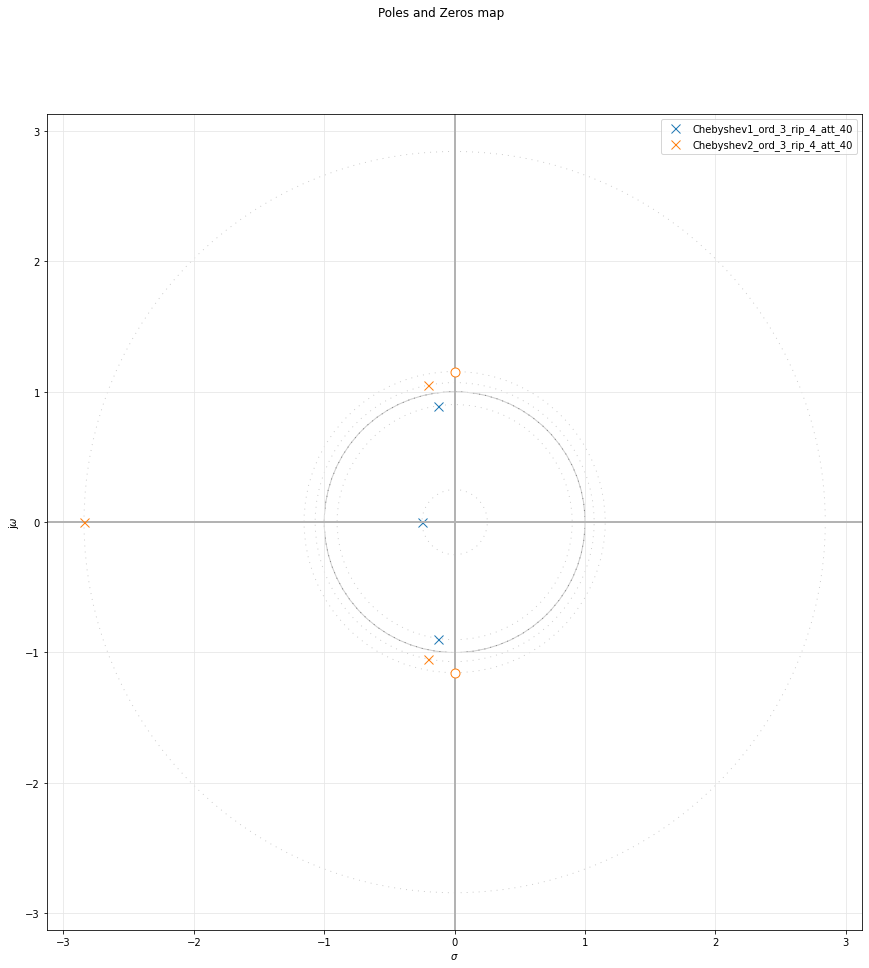

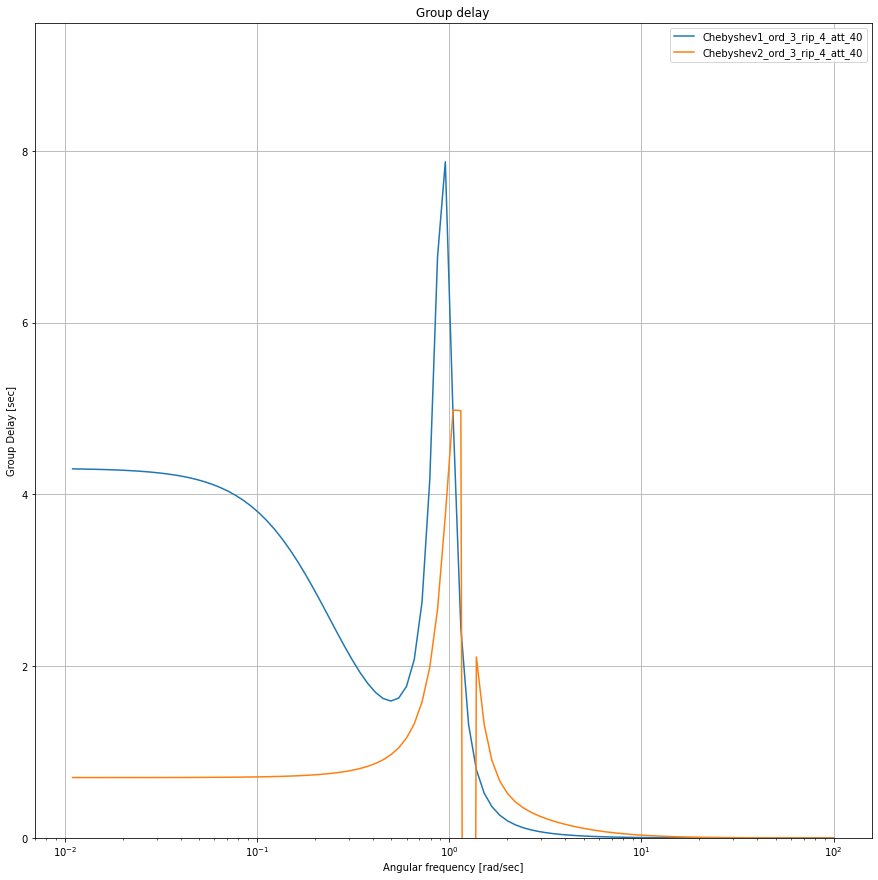

In [3]:

# comparamos las aproximaciones disponibles en scipy
aproxs = ['Chebyshev1', 'Chebyshev2']
#aproxs = ['Butterworth', 'Chebyshev1', 'Cauer']
#aproxs = ['Butterworth', 'Chebyshev1', 'Bessel']


# Mismo requerimiento de orden, ripple y atenuación
orders2analyze = [3] * len(aproxs)
ripple = [4] * len(aproxs) # dB \alpha_{max} <-- Sin parametrizar, lo dejo en Butterworth
attenuation = [40] * len(aproxs) # dB \alpha_{min} <-- Sin parametrizar, att fija


sim_aprox(aproxs, orders2analyze, ripple, attenuation)


sim_aprox(aproxs, orders2analyze, ripple, attenuation)
